# Spurious Correlations from Compositional Data Analysis 

Compositional data refers to data sets where each instance (i.e. sample, observation) represents a vector where each element represents a proportion of a whole.  

In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# consider a data set of m observations of [x_1, ..., x_n] ~ N(u, cov)
n = 3         # dimensions of x
m = 300       # number of observations 
u = np.random.randint(0, 1000, n)
cov = 10*np.eye(n)
X = np.abs(np.random.multivariate_normal(u, cov, size=5000))

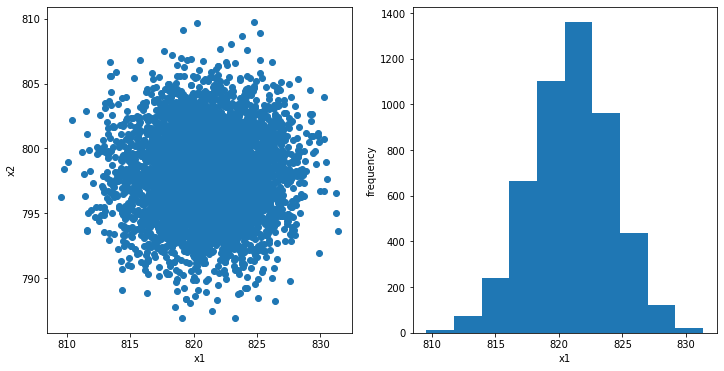

In [3]:
# show scatter plot of x1 and x2 
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(1, 2, 2)
plt.hist(X[:, 0])
plt.xlabel('x1')
plt.ylabel('frequency')
plt.show()

In [4]:
# now we'll transform the data so that x1 and x2 lie on a simplex 
simpleX = (X.T / np.sum(X, axis=1)).T 

print("Now, all samples sum to {:.2f}".format(np.sum(np.sum(simpleX, 1)) / m))

Now, all samples sum to 16.67


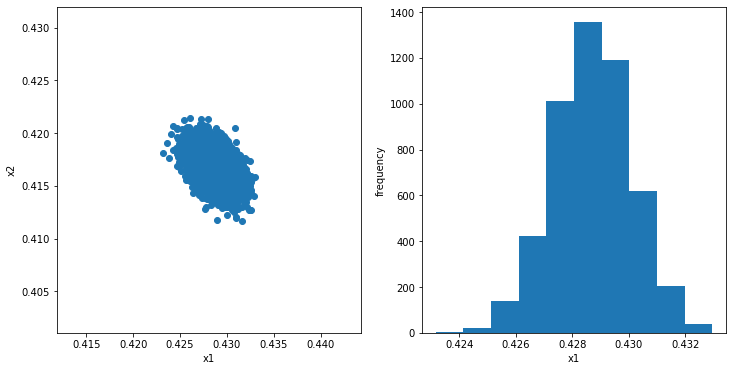

In [5]:
# show scatter plot of x1 and x2 
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(simpleX[:, 0], simpleX[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(1, 2, 2)
plt.hist(simpleX[:, 0])
plt.xlabel('x1')
plt.ylabel('frequency')
plt.show()

In [6]:
cor = np.corrcoef(X.T)
max_cor = np.max(np.abs(cor - np.eye(n)*cor.diagonal()))

print("Max correlation before simplex = {:.3f}".format(max_cor))

Max correlation before simplex = 0.027


In [7]:
simplex_cor = np.corrcoef(simpleX.T)
simplex_max_cor = np.max(np.abs(simplex_cor - np.eye(n)*simplex_cor.diagonal()))

print("Max correlation after simplex = {:.3f}".format(simplex_max_cor))

Max correlation after simplex = 0.543


After playing around with the data, it seems that spurious correlations between variables occur when the dimension of x is low, but correlations between variables are less significant with higher dimensional x. Spurious correlations also occur when the magnitude each x_i is significantly different. 

While microbiome data are very high-dimensional, they magnitude of each x_i will be highly variable, which would likely lead to spurious correlations between variables. 

I still don't see how compositional data compromizes the ability to examine the distributions of each x_i. In the following section, it looks like transforming the data to a simplex does not significantly influence the shape of the distributions for each x_i. 

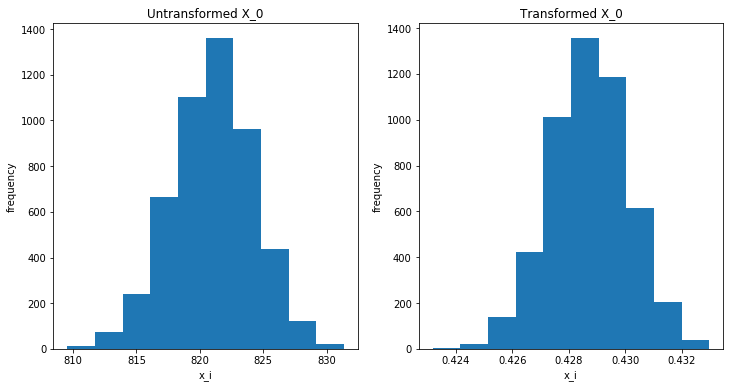

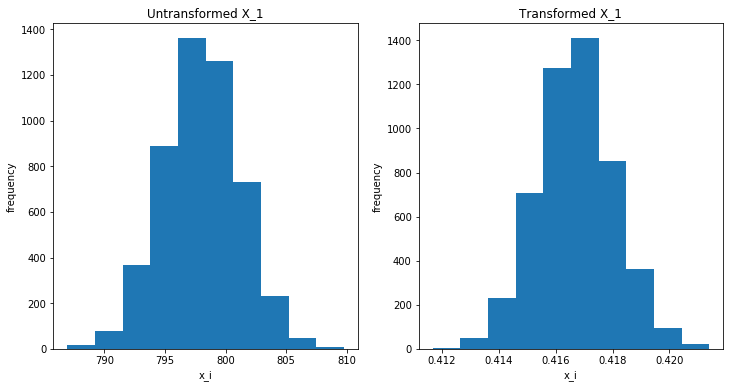

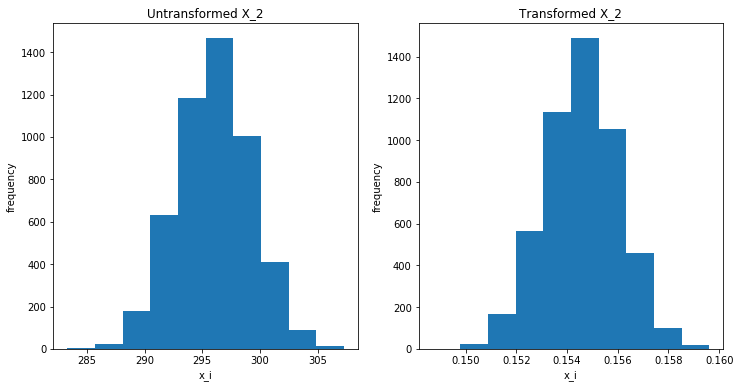

In [8]:
# what about the shapes of the marginal distributions? 

for i in range(n):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(X[:, i])
    plt.xlabel('x_i')
    plt.ylabel('frequency')
    plt.title("Untransformed X_{}".format(i))

    plt.subplot(1, 2, 2)
    plt.hist(simpleX[:, i])
    plt.xlabel('x_i')
    plt.ylabel('frequency')
    plt.title("Transformed X_{}".format(i))
    plt.show()